# 4 Univariate Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/kaiyang/Desktop/employeedata.csv')
df.head() 

,id,gender,bdate,educ,jobcat,salary,salbegin,jobtime,prevexp,minority
0,1,m,2/3/1952,15,3,57000,27000,98,144,0
1,2,m,5/23/1958,16,1,40200,18750,98,36,0
2,3,f,7/26/1929,12,1,21450,12000,98,381,0
3,4,f,4/15/1947,8,1,21900,13200,98,190,0
4,5,m,2/9/1955,15,1,45000,21000,98,138,0


In [3]:
df.shape

(474, 10)

In [4]:
df.dtypes

id           int64
gender      object
bdate       object
educ         int64
jobcat       int64
salary       int64
salbegin     int64
jobtime      int64
prevexp      int64
minority     int64
dtype: object

# Univariate analysis

#### The prefix ‘Uni’ means one, meaning ‘univariate analysis’ is the analysis of one variable at a time.

#### For numeric features, we want to know the range of values present and how often these values (or groups of values) occur.

#### For categorical features, we want to know the number of unique classes and how frequently they occur.

## Part 1: Numeric features

#### These are features with numbers that you can perform mathematical operations on. They are further divided into discrete (countable integers with clear boundaries) and continuous (can take any value, even decimals, within a range).

#### We first display summary statistics for each numeric feature using df.describe(). This shows us the actual statistics.

In [5]:
df.describe()

,id,educ,jobcat,salary,salbegin,jobtime,prevexp,minority
count,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000
mean,237.500000,13.491561,1.411392,34419.567511,17016.086498,81.109705,95.860759,0.219409
std,136.976275,2.884846,0.773201,17075.661465,7870.638154,10.060945,104.586236,0.414284
min,1.000000,8.000000,1.000000,15750.000000,9000.000000,63.000000,0.000000,0.000000
25%,119.250000,12.000000,1.000000,24000.000000,12487.500000,72.000000,19.250000,0.000000
50%,237.500000,12.000000,1.000000,28875.000000,15000.000000,81.000000,55.000000,0.000000
75%,355.750000,15.000000,1.000000,36937.500000,17490.000000,90.000000,138.750000,0.000000
max,474.000000,21.000000,3.000000,135000.000000,79980.000000,98.000000,476.000000,1.000000


### 1. Histograms — sns.histplot()

#### A histogram groups values into ranges (or bins), and the height of a bar shows how many values fall in that range.

#### From a histogram, we will get the following:

#### Range of the data. The minimum and maximum values are on opposite edges of the histogram. Highly concentrated regions are also apparent. Tall bars are where most data points fall whereas sparsely represented ranges appear as gaps or short bars.

#### Shape or skewness of the feature. A feature can be right-skewed (tail is towards right), left-skewed (left-tailed), normally distributed (one center), or randomly distributed (no apparent pattern, multiple peaks).

#### Presence of outliers. These appear as isolated bars on the far left or right.

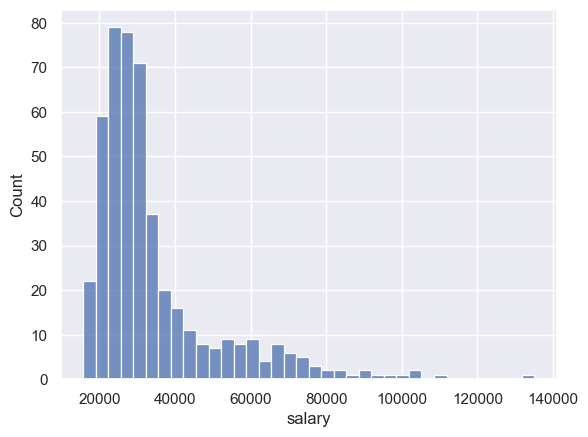

In [6]:
sns.set_theme(style="darkgrid")
sns.histplot(x='salary', data=df);
plt.show()

### 2. KDE plot — sns.kdeplot()

#### The ‘kernel density estimate’ plot creates a smooth version of a histogram by normalizing all points to appear under one curve.

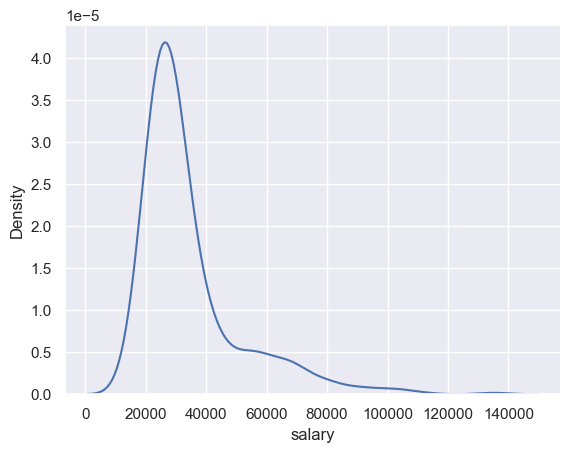

In [7]:
sns.set_theme(style="darkgrid")
sns.kdeplot(x='salary', data=df)
plt.show()

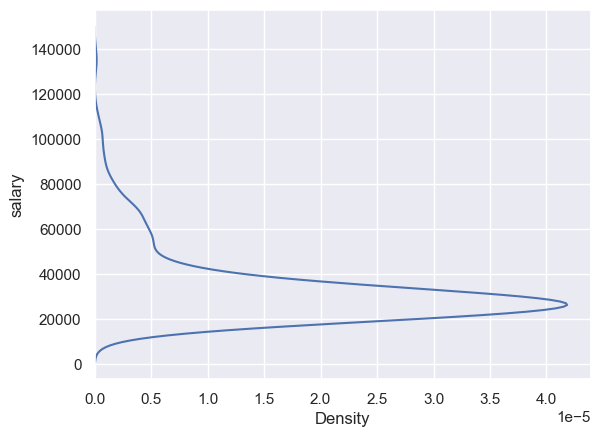

In [8]:
# alternatively, you can make the graph horizontal. 
sns.set_theme(style="darkgrid")
sns.kdeplot(y='salary', data=df)
plt.show()

### 3. KDE with Histogram plot — sns.histplot(kde=True)

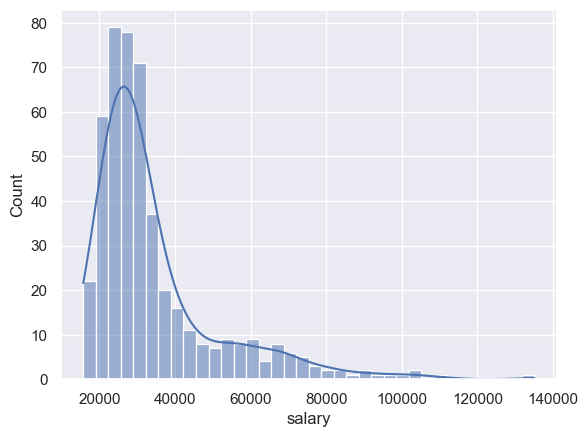

In [9]:
sns.set_theme(style="darkgrid")
sns.histplot(x='salary', data=df, kde=True)
plt.show()

### 4. Rug plot — sns.rugplot()

#### A rug plot draws ticks on the x-axis that show the location of individual data points.

#### The dense areas are places where most observations fall under while the heights of the ticks are inconsequential.

#### Rug plots complement histograms when it comes to outliers because we can see where the outlier data points fall.


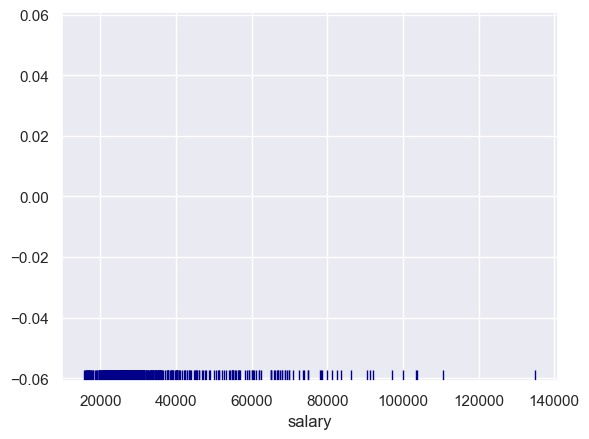

In [10]:
sns.set_theme(style="darkgrid")
sns.rugplot(x='salary', data=df, height=.03, color='darkblue')
plt.show()

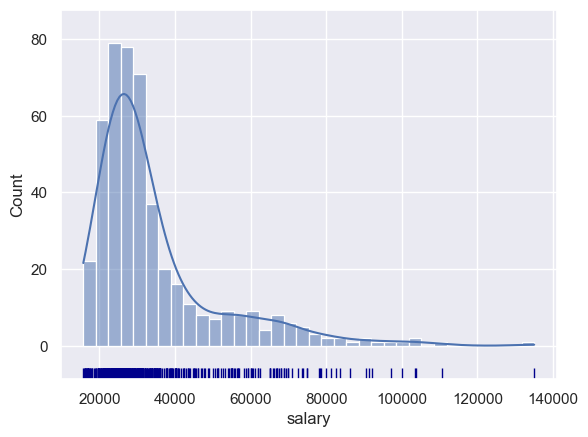

In [11]:
sns.set_theme(style="darkgrid")
sns.rugplot(x='salary', data=df, height=.03, color='darkblue')
sns.histplot(x='salary', data=df, kde=True)
plt.show()

### 5. Box plots — sns.boxplot()

#### A boxplot shows the distribution, center and skewness of a numeric feature. It divides the data into sections that contain 25% of the data approximately.


#### Outliers, if present, appear as dots on either end. The whiskers that extend from the box represent the minimum and maximum values. The box depicts the Interquartile range and holds 50% of the data.


#### Boxplots take up less space than histograms as they are less detailed. They also define quartile locations and are good for quick comparisons between different features or segments.


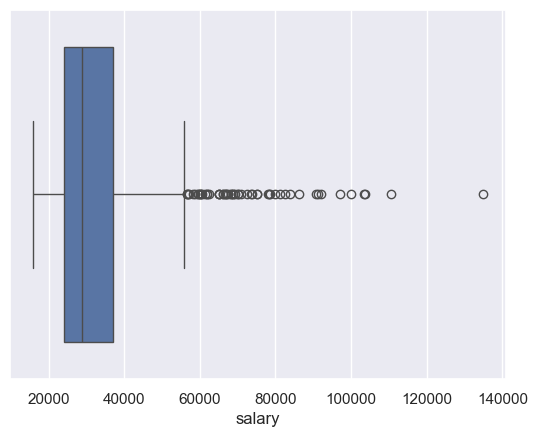

In [12]:
sns.boxplot(x=df['salary'])
plt.show()

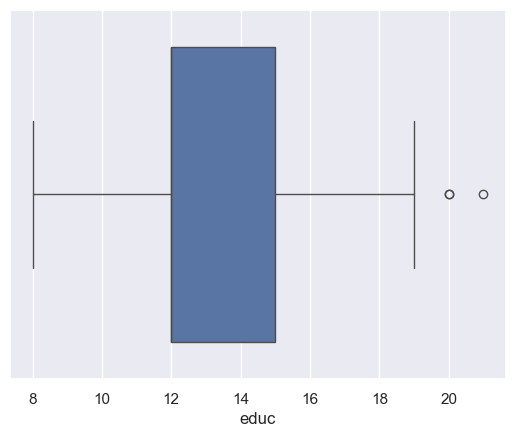

In [13]:
sns.boxplot(x=df['educ']) 
plt.show()

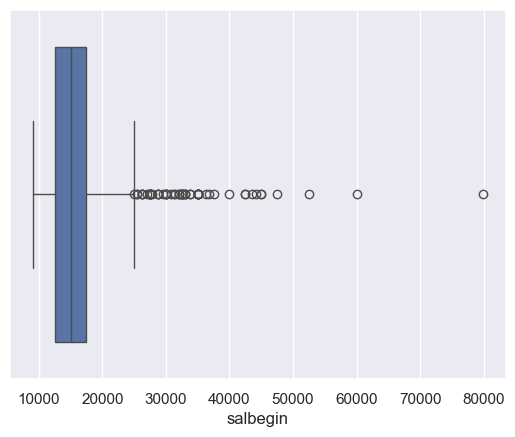

In [14]:
sns.boxplot(x=df['salbegin'])  
plt.show()

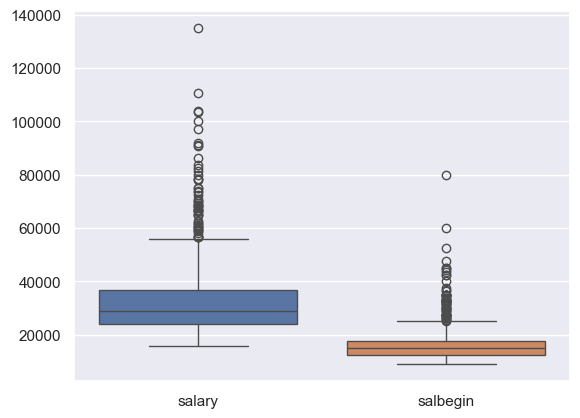

In [15]:
# Try two variables in one graph, such as salary and salbegin. 

# Suppose you want to compare the distribution of two columns that are related; perhaps they have the same measuring unit.  

sns.boxplot(data=df.loc[:,['salary','salbegin']]) 
plt.show()

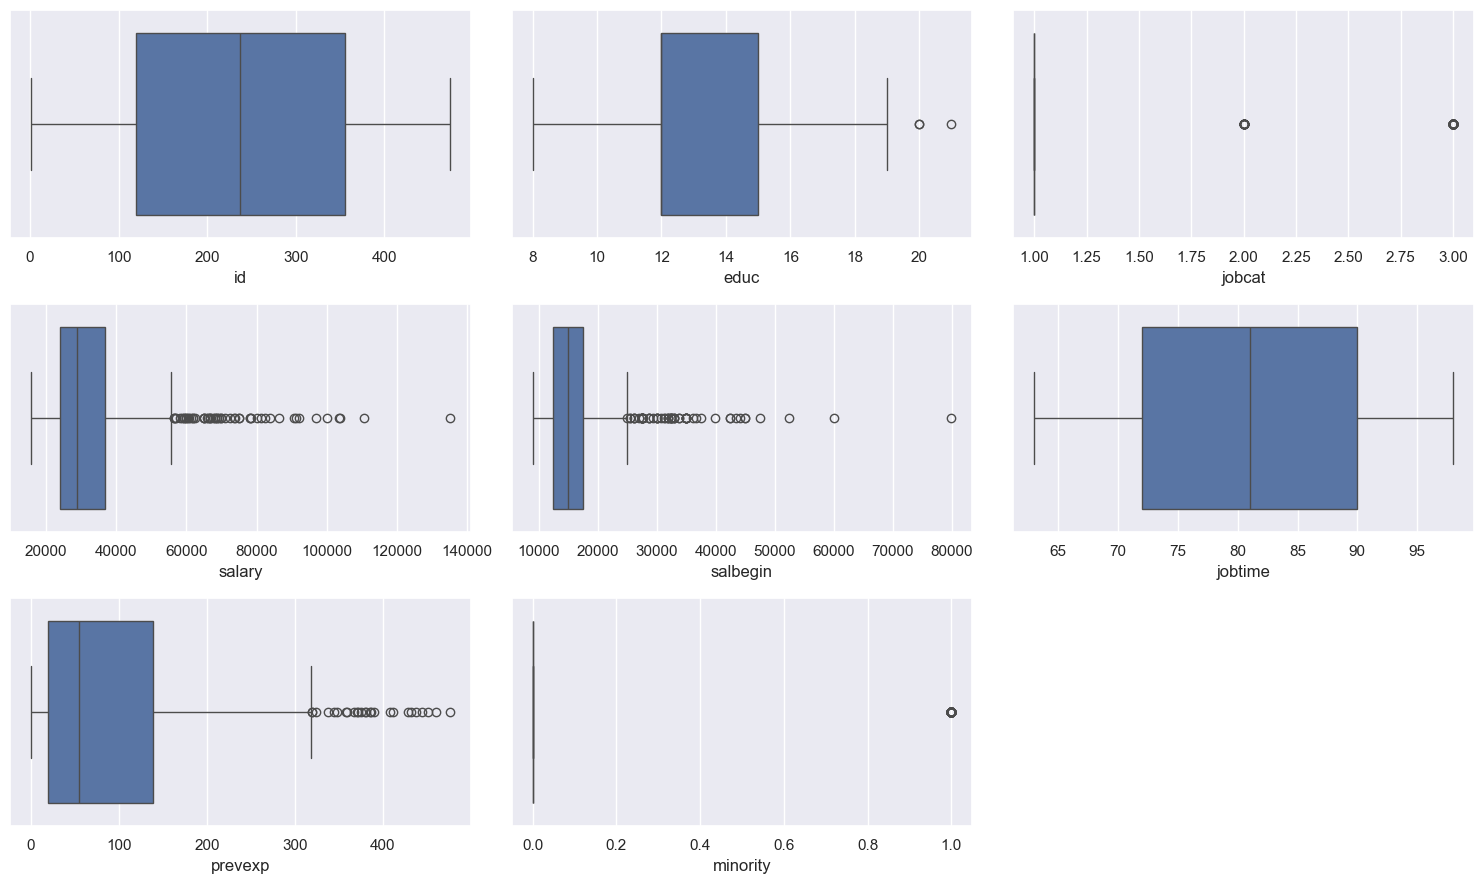

In [16]:
# The code below creates boxplots for all the numeric variables in a loop

cols = 3
rows = 3
num_cols = df.select_dtypes(exclude='object').columns
fig = plt.figure(figsize= (15,9))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot( rows, cols, i+1)
    
    sns.boxplot(x=df[col], ax=ax)
    
fig.tight_layout()  
plt.show()

### 6. Violin plot — sns.violinplot()


#### The violin plot features a combination of a box plot and a kernel density plot. This means that in addition to showing the quartiles, it also lays out the underlying distribution such as presence and location of different peaks.


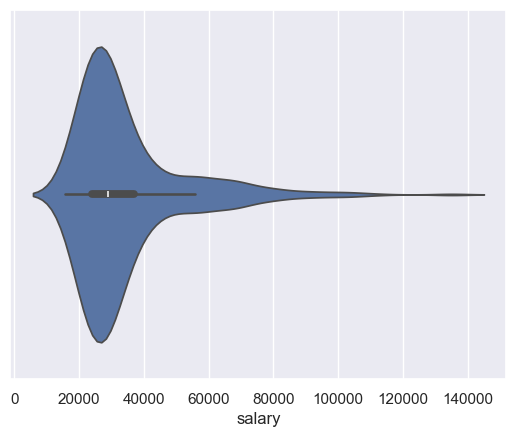

In [17]:
sns.violinplot(x=df["salary"])
plt.show()

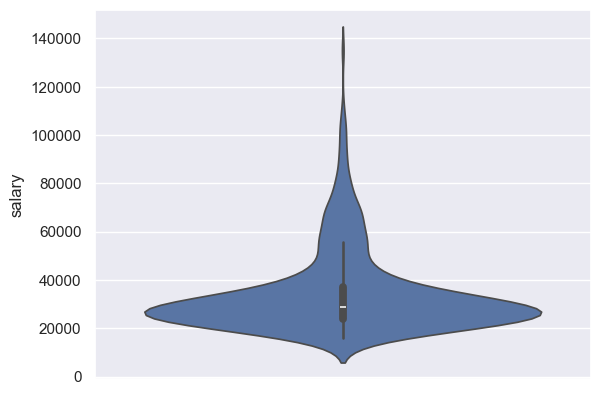

In [18]:
sns.violinplot(y=df["salary"])
plt.show()

### 7. Strip plot — sns.stripplot()


#### A strip plot implements a scatter plot to show the spread of individual observations for a feature.


#### Dense locations indicate areas with many overlapping points, and you can quickly spot outliers. It’s however hard to establish the relative center unlike a box plot, and it’s best for smaller datasets.


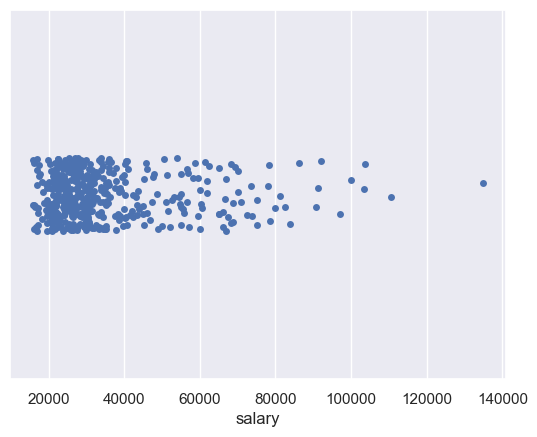

In [19]:
sns.stripplot(x=df["salary"]);
plt.show()

## Part 2: Categorical features


#### These are columns with a limited number of possible values. for example, gender.


#### Before creating the plots, we’ll first run the summary statistics that show information such as the number of unique classes per feature. This will inform us which features can be effectively visualized. If there are too many classes, the plots are cluttered and unreadable.


In [20]:
df.describe(include='object')

,gender,bdate
count,474,474
unique,2,462
top,m,7/18/1962
freq,258,2


### 8. Count plot — sns.countplot()


#### A count plot compares different classes of a categorical feature and how often they occur. Think of a bar chart with the bar height showing number of times each class occurs in the data.


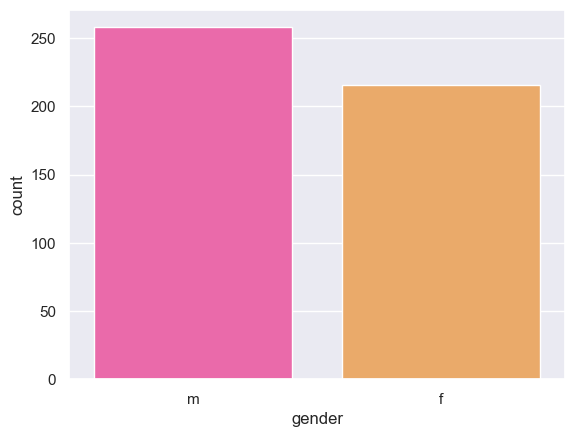

In [21]:
sns.set_theme(style="darkgrid")
sns.countplot(x="gender", hue="gender", data=df, palette="spring")
plt.show()

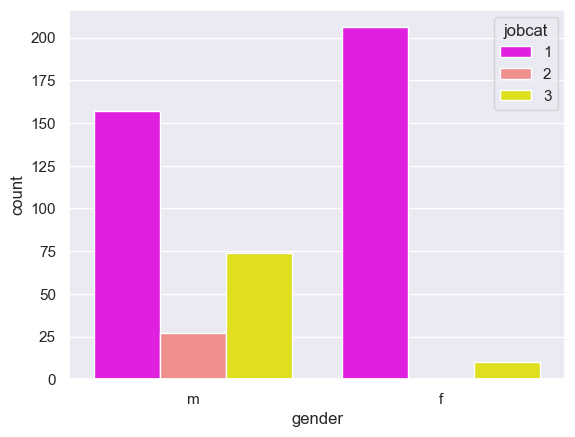

In [22]:
# Two categorical variables 
sns.set_theme(style="darkgrid")
sns.countplot(x="gender", hue="jobcat", data=df, palette="spring")
plt.show()

### 9. Pie chart — plt.pie()


#### A pie chart displays the percentage distribution of a categorical variable in a circular graph.


#### Pie charts are not very popular with the visualization community, largely because the graph appears cluttered when the groups exceed four.


#### Seaborn does not implement pie charts. We’ll use the matplotlib version.


In [23]:
display(df.groupby("gender")[["id",	"educ",	"jobcat", "salary", "salbegin", "jobtime", "prevexp", "minority"]].mean())

,id,educ,jobcat,salary,salbegin,jobtime,prevexp,minority
gender,,,,,,,,
f,249.384259,12.370370,1.092593,26031.921296,13091.967593,80.37963,77.037037,0.185185
m,227.550388,14.430233,1.678295,41441.782946,20301.395349,81.72093,111.620155,0.248062


In [24]:
count = df.groupby(['gender']).size()  # https://www.geeksforgeeks.org/getting-frequency-counts-of-a-columns-in-pandas-dataframe/ 
count

gender
f    216
m    258
dtype: int64

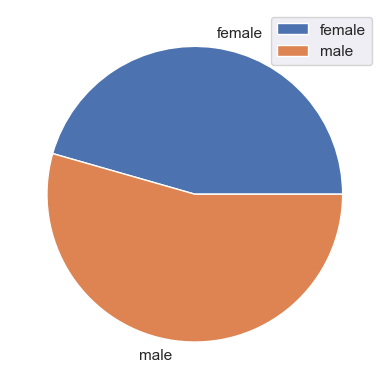

In [25]:
y = np.array([216,258])  # Input the frequencies in the array 
mylabels = ["female", "male"]

plt.pie(y, labels = mylabels)
plt.legend()
plt.show() 

#### Univariate analysis covers just one aspect of data exploration. It examines the distribution of individual features to determine their importance in the data. The next step is to understand the relationships and interactions between the features, also called bivariate and multivariate analysis.


#### Reference: https://towardsdatascience.com/8-seaborn-plots-for-univariate-exploratory-data-analysis-eda-in-python-9d280b6fe67f


# The end, see you next week!